In [1]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn
import psycopg2 as psy
import seaborn as sns
%matplotlib inline

In [2]:
sixteen = pd.read_csv('/Users/supermaxfederman/Desktop/Capstone/aaronhoffman-us-general-election-2016/us-election-2016-results-by-county.csv')
twelve = pd.read_csv('/Users/supermaxfederman/Desktop/Capstone/aaronhoffman-us-general-election-2012/us-election-2012-results-by-county.csv')

In [3]:
sixteen

,﻿StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,AK,alaska,2000,Alaska,246588,GOP,Trump,130415.0
1,AL,alabama,1087,Macon,8748,GOP,Trump,1394.0
2,AL,alabama,1131,Wilcox,6095,GOP,Trump,1737.0
3,AL,alabama,1037,Coosa,5223,GOP,Trump,3376.0
4,AL,alabama,1009,Blount,25384,GOP,Trump,22808.0
5,AL,alabama,1133,Winston,10255,GOP,Trump,9225.0
6,AL,alabama,1123,Tallapoosa,18504,GOP,Trump,12967.0
7,AL,alabama,1053,Escambia,15213,GOP,Trump,10282.0
8,AL,alabama,1057,Fayette,8196,GOP,Trump,6705.0
9,AL,alabama,1049,DeKalb,26086,GOP,Trump,21779.0


In [4]:
PA16 = sixteen[sixteen['StateName']=='pennsylvania']

In [5]:
# Change this so there is a votecount column for each candidate and the Candidate column says who won.
PA16

,﻿StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount
2215,PA,pennsylvania,42001,Adams,47138,GOP,Trump,31249.0
2216,PA,pennsylvania,42003,Allegheny,643173,GOP,Trump,257488.0
2217,PA,pennsylvania,42005,Armstrong,30446,GOP,Trump,22676.0
2218,PA,pennsylvania,42007,Beaver,79036,GOP,Trump,46081.0
2219,PA,pennsylvania,42009,Bedford,23504,GOP,Trump,19455.0
2220,PA,pennsylvania,42011,Berks,175934,GOP,Trump,93094.0
2221,PA,pennsylvania,42013,Blair,52029,GOP,Trump,37224.0
2222,PA,pennsylvania,42015,Bradford,25399,GOP,Trump,17957.0
2223,PA,pennsylvania,42017,Bucks,342572,GOP,Trump,163873.0
2224,PA,pennsylvania,42019,Butler,92027,GOP,Trump,61388.0


In [155]:
PA16['CountyName'].unique()

array(['Adams', 'Allegheny', 'Armstrong', 'Beaver', 'Bedford', 'Berks',
       'Blair', 'Bradford', 'Bucks', 'Butler', 'Cambria', 'Cameron',
       'Carbon', 'Centre', 'Chester', 'Clarion', 'Clearfield', 'Clinton',
       'Columbia', 'Crawford', 'Cumberland', 'Dauphin', 'Delaware', 'Elk',
       'Erie', 'Fayette', 'Forest', 'Franklin', 'Fulton', 'Greene',
       'Huntingdon', 'Indiana', 'Jefferson', 'Juniata', 'Lackawanna',
       'Lancaster', 'Lawrence', 'Lebanon', 'Lehigh', 'Luzerne', 'Lycoming',
       'McKean', 'Mercer', 'Mifflin', 'Monroe', 'Montgomery', 'Montour',
       'Northampton', 'Northumberland', 'Perry', 'Philadelphia', 'Pike',
       'Potter', 'Schuylkill', 'Snyder', 'Somerset', 'Sullivan',
       'Susquehanna', 'Tioga', 'Union', 'Venango', 'Warren', 'Washington',
       'Wayne', 'Westmoreland', 'Wyoming', 'York'], dtype=object)

In [6]:
Trump = PA16[PA16['Candidate']== 'Trump']

In [7]:
Clinton = PA16[PA16['Candidate']== 'Clinton']

In [8]:
el16 = pd.concat([Trump, Clinton])

In [9]:
#Clinton had 47.64% 
#Trump had 48.79%
el16.groupby(by='Candidate', axis =0).sum()

,CountyFips,CountyTotalVote,VoteCount
Candidate,,,
Clinton,2818489,5970107,2844705.0
Trump,2818489,5970107,2912941.0


In [10]:
el16

,﻿StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount
2215,PA,pennsylvania,42001,Adams,47138,GOP,Trump,31249.0
2216,PA,pennsylvania,42003,Allegheny,643173,GOP,Trump,257488.0
2217,PA,pennsylvania,42005,Armstrong,30446,GOP,Trump,22676.0
2218,PA,pennsylvania,42007,Beaver,79036,GOP,Trump,46081.0
2219,PA,pennsylvania,42009,Bedford,23504,GOP,Trump,19455.0
2220,PA,pennsylvania,42011,Berks,175934,GOP,Trump,93094.0
2221,PA,pennsylvania,42013,Blair,52029,GOP,Trump,37224.0
2222,PA,pennsylvania,42015,Bradford,25399,GOP,Trump,17957.0
2223,PA,pennsylvania,42017,Bucks,342572,GOP,Trump,163873.0
2224,PA,pennsylvania,42019,Butler,92027,GOP,Trump,61388.0


In [99]:
el16['Winner%'] = round((el16['VoteCount']/el16['CountyTotalVote'])*100, 2)

In [101]:
el16.to_csv("el16.csv")

In [102]:
el16

,﻿StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,Winner%
2215,PA,pennsylvania,42001,Adams,47138,GOP,Trump,31249.0,66.29
2216,PA,pennsylvania,42003,Allegheny,643173,GOP,Trump,257488.0,40.03
2217,PA,pennsylvania,42005,Armstrong,30446,GOP,Trump,22676.0,74.48
2218,PA,pennsylvania,42007,Beaver,79036,GOP,Trump,46081.0,58.30
2219,PA,pennsylvania,42009,Bedford,23504,GOP,Trump,19455.0,82.77
2220,PA,pennsylvania,42011,Berks,175934,GOP,Trump,93094.0,52.91
2221,PA,pennsylvania,42013,Blair,52029,GOP,Trump,37224.0,71.54
2222,PA,pennsylvania,42015,Bradford,25399,GOP,Trump,17957.0,70.70
2223,PA,pennsylvania,42017,Bucks,342572,GOP,Trump,163873.0,47.84
2224,PA,pennsylvania,42019,Butler,92027,GOP,Trump,61388.0,66.71


In [105]:
TWins = Trump[Trump['VoteCount'] > Clinton['VoteCount']]

In [125]:
TWins.count

﻿StateCode         56
StateName          56
CountyFips         56
CountyName         56
CountyTotalVote    56
Party              56
Candidate          56
VoteCount          56
dtype: int64

In [108]:
CWins = Clinton[Clinton['VoteCount'] > Trump['VoteCount']]

In [126]:
CWins.count()

﻿StateCode         11
StateName          11
CountyFips         11
CountyName         11
CountyTotalVote    11
Party              11
Candidate          11
VoteCount          11
dtype: int64

In [110]:
win16 = pd.concat([TWins, CWins])

In [114]:
win16['Vote%'] = round((win16['VoteCount']/win16['CountyTotalVote'])*100, 2)

In [116]:
win16.to_csv("win16.csv")

In [117]:
win16

,﻿StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,Vote%
2215,PA,pennsylvania,42001,Adams,47138,GOP,Trump,31249.0,66.29
2217,PA,pennsylvania,42005,Armstrong,30446,GOP,Trump,22676.0,74.48
2218,PA,pennsylvania,42007,Beaver,79036,GOP,Trump,46081.0,58.30
2219,PA,pennsylvania,42009,Bedford,23504,GOP,Trump,19455.0,82.77
2220,PA,pennsylvania,42011,Berks,175934,GOP,Trump,93094.0,52.91
2221,PA,pennsylvania,42013,Blair,52029,GOP,Trump,37224.0,71.54
2222,PA,pennsylvania,42015,Bradford,25399,GOP,Trump,17957.0,70.70
2224,PA,pennsylvania,42019,Butler,92027,GOP,Trump,61388.0,66.71
2225,PA,pennsylvania,42021,Cambria,60167,GOP,Trump,40510.0,67.33
2226,PA,pennsylvania,42023,Cameron,2024,GOP,Trump,1495.0,73.86


In [11]:
c = el16['Candidate'].map(lambda x: 'r' if x == 'Trump' else 'b')
c

2215    r
2216    r
2217    r
2218    r
2219    r
2220    r
2221    r
2222    r
2223    r
2224    r
2225    r
2226    r
2227    r
2228    r
2229    r
2230    r
2231    r
2232    r
2233    r
2234    r
2235    r
2236    r
2237    r
2238    r
2239    r
2240    r
2241    r
2242    r
2243    r
2244    r
       ..
5365    b
5366    b
5367    b
5368    b
5369    b
5370    b
5371    b
5372    b
5373    b
5374    b
5375    b
5376    b
5377    b
5378    b
5379    b
5380    b
5381    b
5382    b
5383    b
5384    b
5385    b
5386    b
5387    b
5388    b
5389    b
5390    b
5391    b
5392    b
5393    b
5394    b
Name: Candidate, dtype: object

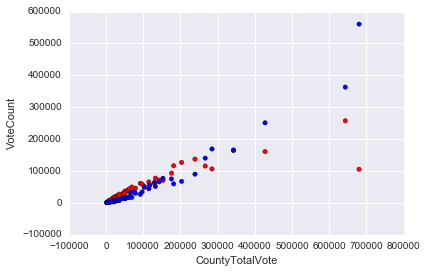

In [12]:
el16.plot(kind='scatter',x='CountyTotalVote', y='VoteCount', c=c)

In [13]:
#PA16['Candidate'].unique()

array(['Trump', 'Clinton', 'Stein', 'Johnson', 'Castle'], dtype=object)

In [26]:
#PA16.groupby(by='Candidate', axis =0).sum()

In [15]:
#CountyVotes = PA16[['Candidate', 'VoteCount']]

In [27]:
#CountyVotes['Candidate'].value_counts()

In [28]:
#PA16.info()

In [29]:
#PA16.describe()

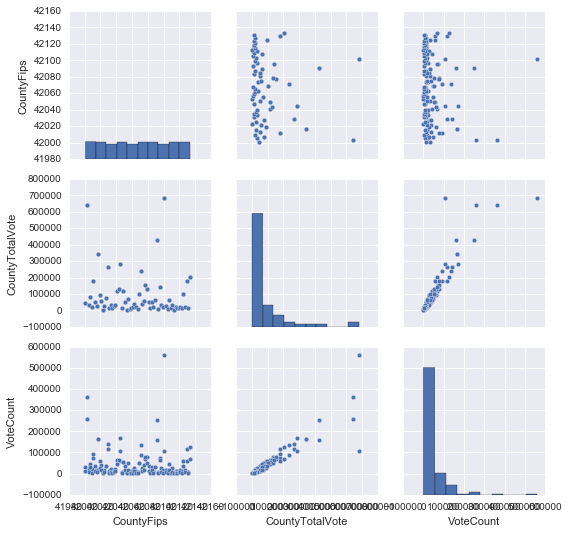

In [19]:
sns.pairplot(el16)

In [30]:
#sns.pairplot(PA16)

In [31]:
#c = PA16['Candidate'].map(lambda x: 'r' if x == 'Trump' else 'b')
#c

In [32]:
#PA16.plot(kind='scatter',x='CountyTotalVote', y='VoteCount', c=c)

In [24]:
#Export to postgres to plot vote and % of vote per county in PA 

In [25]:
twelve

,﻿County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes
0,2,AK,Alaska,2001,2000,437,438,220596,1,Dem,Barack,Obama,91696
1,4,AL,Autauga,1001,1001,28,28,23909,1,Dem,Barack,Obama,6354
2,5,AL,Baldwin,1002,1003,55,55,84988,1,Dem,Barack,Obama,18329
3,6,AL,Barbour,1003,1005,19,19,11459,1,Dem,Barack,Obama,5873
4,7,AL,Bibb,1004,1007,10,10,8391,1,Dem,Barack,Obama,2200
5,8,AL,Blount,1005,1009,28,28,23980,1,Dem,Barack,Obama,2961
6,9,AL,Bullock,1006,1011,18,18,5318,1,Dem,Barack,Obama,4058
7,10,AL,Butler,1007,1013,28,28,9483,1,Dem,Barack,Obama,4367
8,11,AL,Calhoun,1008,1015,54,54,46240,1,Dem,Barack,Obama,15500
9,12,AL,Chambers,1009,1017,23,23,14562,1,Dem,Barack,Obama,6853


In [36]:
PA12 = twelve[twelve['StateCode']=='PA']

In [37]:
PA12

,﻿County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes
867,883,PA,Adams,39001,42001,49,49,41973,1,Dem,Barack,Obama,14893
868,884,PA,Allegheny,39002,42003,1319,1319,614671,1,Dem,Barack,Obama,348151
869,885,PA,Armstrong,39003,42005,68,68,28322,1,Dem,Barack,Obama,8694
870,886,PA,Beaver,39004,42007,129,129,80015,1,Dem,Barack,Obama,36833
871,887,PA,Bedford,39005,42009,40,40,21444,1,Dem,Barack,Obama,4730
872,888,PA,Berks,39006,42011,198,198,163253,1,Dem,Barack,Obama,79895
873,889,PA,Blair,39007,42013,97,97,47631,1,Dem,Barack,Obama,15516
874,890,PA,Bradford,39008,42015,61,61,22501,1,Dem,Barack,Obama,8291
875,891,PA,Bucks,39009,42017,304,304,319407,1,Dem,Barack,Obama,159598
876,892,PA,Butler,39010,42019,89,89,88924,1,Dem,Barack,Obama,28385


In [38]:
rom = PA12[PA12['Party']== 'GOP']
rom

,﻿County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes
5455,5522,PA,Adams,39001,42001,49,49,41973,2,GOP,Mitt,Romney,26490
5456,5523,PA,Allegheny,39002,42003,1319,1319,614671,2,GOP,Mitt,Romney,259304
5457,5524,PA,Armstrong,39003,42005,68,68,28322,2,GOP,Mitt,Romney,19231
5458,5525,PA,Beaver,39004,42007,129,129,80015,2,GOP,Mitt,Romney,42118
5459,5526,PA,Bedford,39005,42009,40,40,21444,2,GOP,Mitt,Romney,16509
5460,5527,PA,Berks,39006,42011,198,198,163253,2,GOP,Mitt,Romney,80857
5461,5528,PA,Blair,39007,42013,97,97,47631,2,GOP,Mitt,Romney,31500
5462,5529,PA,Bradford,39008,42015,61,61,22501,2,GOP,Mitt,Romney,13827
5463,5530,PA,Bucks,39009,42017,304,304,319407,2,GOP,Mitt,Romney,155876
5464,5531,PA,Butler,39010,42019,89,89,88924,2,GOP,Mitt,Romney,59416


In [39]:
ob = PA12[PA12['Party']== 'Dem']
ob

,﻿County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes
867,883,PA,Adams,39001,42001,49,49,41973,1,Dem,Barack,Obama,14893
868,884,PA,Allegheny,39002,42003,1319,1319,614671,1,Dem,Barack,Obama,348151
869,885,PA,Armstrong,39003,42005,68,68,28322,1,Dem,Barack,Obama,8694
870,886,PA,Beaver,39004,42007,129,129,80015,1,Dem,Barack,Obama,36833
871,887,PA,Bedford,39005,42009,40,40,21444,1,Dem,Barack,Obama,4730
872,888,PA,Berks,39006,42011,198,198,163253,1,Dem,Barack,Obama,79895
873,889,PA,Blair,39007,42013,97,97,47631,1,Dem,Barack,Obama,15516
874,890,PA,Bradford,39008,42015,61,61,22501,1,Dem,Barack,Obama,8291
875,891,PA,Bucks,39009,42017,304,304,319407,1,Dem,Barack,Obama,159598
876,892,PA,Butler,39010,42019,89,89,88924,1,Dem,Barack,Obama,28385


In [40]:
el12 = pd.concat([rom, ob])

In [41]:
el12

,﻿County2012Id,StateCode,CountyName,CountyNumber,FipsCode,PrecintsReporting,TotalPrecincts,CountyTotalVotes,SourceOrder,Party,FirstName,LastName,Votes
5455,5522,PA,Adams,39001,42001,49,49,41973,2,GOP,Mitt,Romney,26490
5456,5523,PA,Allegheny,39002,42003,1319,1319,614671,2,GOP,Mitt,Romney,259304
5457,5524,PA,Armstrong,39003,42005,68,68,28322,2,GOP,Mitt,Romney,19231
5458,5525,PA,Beaver,39004,42007,129,129,80015,2,GOP,Mitt,Romney,42118
5459,5526,PA,Bedford,39005,42009,40,40,21444,2,GOP,Mitt,Romney,16509
5460,5527,PA,Berks,39006,42011,198,198,163253,2,GOP,Mitt,Romney,80857
5461,5528,PA,Blair,39007,42013,97,97,47631,2,GOP,Mitt,Romney,31500
5462,5529,PA,Bradford,39008,42015,61,61,22501,2,GOP,Mitt,Romney,13827
5463,5530,PA,Bucks,39009,42017,304,304,319407,2,GOP,Mitt,Romney,155876
5464,5531,PA,Butler,39010,42019,89,89,88924,2,GOP,Mitt,Romney,59416


In [42]:
c = el12['Party'].map(lambda x: 'b' if x == 'Dem' else 'r')
c

5455    r
5456    r
5457    r
5458    r
5459    r
5460    r
5461    r
5462    r
5463    r
5464    r
5465    r
5466    r
5467    r
5468    r
5469    r
5470    r
5471    r
5472    r
5473    r
5474    r
5475    r
5476    r
5477    r
5478    r
5479    r
5480    r
5481    r
5482    r
5483    r
5484    r
       ..
904     b
905     b
906     b
907     b
908     b
909     b
910     b
911     b
912     b
913     b
914     b
915     b
916     b
917     b
918     b
919     b
920     b
921     b
922     b
923     b
924     b
925     b
926     b
927     b
928     b
929     b
930     b
931     b
932     b
933     b
Name: Party, dtype: object

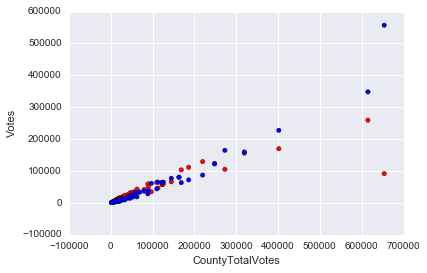

In [43]:
el12.plot(kind='scatter',x='CountyTotalVotes', y='Votes', c=c)

In [28]:
# focus only on Pennsylvania for now. Battleground state and likely interesting results

In [29]:
# Registered Reps & Dems by county in PA by month/ year

In [60]:
#PA Voter Reg info
VR16 = pd.read_csv('/Users/supermaxfederman/Desktop/Capstone/PA voter registration info/2016 Election VR Stats.csv')
VR_El_15= pd.read_csv('/Users/supermaxfederman/Desktop/Capstone/PA voter registration info/2015 Election VR Stats.csv')
VR_Prim_15= pd.read_csv('/Users/supermaxfederman/Desktop/Capstone/PA voter registration info/2015 Primary VR Stats.csv')
VR_El_14= pd.read_csv('/Users/supermaxfederman/Desktop/Capstone/PA voter registration info/2014 Election VR Stats.csv')
VR_Prim_12= pd.read_csv('/Users/supermaxfederman/Desktop/Capstone/PA voter registration info/2012PrimaryVRTotals.csv')
VR_El_12 = pd.read_csv('/Users/supermaxfederman/Desktop/Capstone/PA voter registration info/2012ElectionVRTotals.csv')
VR_Prim_11 = pd.read_csv('/Users/supermaxfederman/Desktop/Capstone/PA voter registration info/2011PrimaryStats.csv')
VR_El_11 = pd.read_csv('/Users/supermaxfederman/Desktop/Capstone/PA voter registration info/2011ElStats.csv')

In [46]:
#VR16=VR16[4:]
VR16

,Commonwealth of Pennsylvania,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,2016 Voter Registration Statistics - Official ...,NaN,NaN,NaN,NaN
1,Department of State,NaN,NaN,NaN,NaN
2,Division of Voter Registration,NaN,NaN,NaN,NaN
3,County,Democratic,Republican,Other\rParties,All\rParties
4,Adams,"20,173","35,990","10,555","66,718"
5,Allegheny,"539,900","259,534","125,197","924,631"
6,Armstrong,"15,782","22,120","4,650","42,552"
7,Beaver,"59,241","40,793","13,564","113,598"
8,Bedford,"9,465","21,731","3,264","34,460"
9,Berks,"120,217","100,782","38,801","259,800"


In [47]:
VR16.columns = VR16.iloc[3]

In [48]:
#VR16.reindex(VR16.index.drop(3))

3,County,Democratic,Republican,Other Parties,All Parties
0,2016 Voter Registration Statistics - Official ...,NaN,NaN,NaN,NaN
1,Department of State,NaN,NaN,NaN,NaN
2,Division of Voter Registration,NaN,NaN,NaN,NaN
4,Adams,"20,173","35,990","10,555","66,718"
5,Allegheny,"539,900","259,534","125,197","924,631"
6,Armstrong,"15,782","22,120","4,650","42,552"
7,Beaver,"59,241","40,793","13,564","113,598"
8,Bedford,"9,465","21,731","3,264","34,460"
9,Berks,"120,217","100,782","38,801","259,800"
10,Blair,"24,080","44,360","9,394","77,834"


In [52]:
count16 = VR16[4:]

In [54]:
count16.to_csv('CountyVotePA2016')

In [55]:
count16

3,County,Democratic,Republican,Other Parties,All Parties
4,Adams,"20,173","35,990","10,555","66,718"
5,Allegheny,"539,900","259,534","125,197","924,631"
6,Armstrong,"15,782","22,120","4,650","42,552"
7,Beaver,"59,241","40,793","13,564","113,598"
8,Bedford,"9,465","21,731","3,264","34,460"
9,Berks,"120,217","100,782","38,801","259,800"
10,Blair,"24,080","44,360","9,394","77,834"
11,Bradford,"10,479","22,376","4,794","37,649"
12,Bucks,"198,007","188,625","74,200","460,832"
13,Butler,"42,272","69,603","17,853","129,728"


In [56]:
np.sum(count16['Democratic'])

'20,173539,90015,78259,2419,465120,21724,08010,479198,00742,27245,3781,21118,38751,155136,9908,24920,7179,15716,13519,41955,71586,930189,1679,52697,59748,6021,26925,1172,53712,4749,21420,6129,5793,97091,046108,17227,51627,298115,745108,05522,4427,31234,0967,59951,884272,2874,74299,07521,7117,177853,09113,9722,84433,8465,58717,6111,5268,0357,1837,62511,08110,50268,02610,152113,5825,350102,5634,217,456'

In [57]:
count16.columns

Index(['County', 'Democratic', 'Republican', 'Other\rParties', 'All\rParties'], dtype='object', name=3)

In [35]:
#VR_El_15 = VR_El_15[3:]
VR_El_15

,Commonwealth of Pennsylvania,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,2015 Voter Registration Statistics - Official ...,NaN,NaN,NaN,NaN
1,Department of State,NaN,NaN,NaN,NaN
2,Division of Voter Registration,NaN,NaN,NaN,NaN
3,County,Democratic,Republican,Other\rParties,All\rParties
4,Adams,"19,000","32,187","9,763","60,950"
5,Allegheny,"507,479","232,134","114,034","853,647"
6,Armstrong,"15,988","19,641","4,353","39,982"
7,Beaver,"58,808","35,516","12,510","106,834"
8,Bedford,"9,685","19,750","3,085","32,520"
9,Berks,"113,322","90,786","36,658","240,766"


In [61]:
VR_El_15.columns = VR_El_15.iloc[3]

In [62]:
VR_El_15.reindex(VR_El_15.index.drop(3))

3,County,Democratic,Republican,Other Parties,All Parties
0,2015 Voter Registration Statistics - Official ...,NaN,NaN,NaN,NaN
1,Department of State,NaN,NaN,NaN,NaN
2,Division of Voter Registration,NaN,NaN,NaN,NaN
4,Adams,"19,000","32,187","9,763","60,950"
5,Allegheny,"507,479","232,134","114,034","853,647"
6,Armstrong,"15,988","19,641","4,353","39,982"
7,Beaver,"58,808","35,516","12,510","106,834"
8,Bedford,"9,685","19,750","3,085","32,520"
9,Berks,"113,322","90,786","36,658","240,766"
10,Blair,"23,708","40,455","8,888","73,051"


In [63]:
count15 = VR_El_15[4:]

In [64]:
count15

3,County,Democratic,Republican,Other Parties,All Parties
4,Adams,"19,000","32,187","9,763","60,950"
5,Allegheny,"507,479","232,134","114,034","853,647"
6,Armstrong,"15,988","19,641","4,353","39,982"
7,Beaver,"58,808","35,516","12,510","106,834"
8,Bedford,"9,685","19,750","3,085","32,520"
9,Berks,"113,322","90,786","36,658","240,766"
10,Blair,"23,708","40,455","8,888","73,051"
11,Bradford,"10,299","20,535","4,478","35,312"
12,Bucks,"185,019","172,731","70,921","428,671"
13,Butler,"40,729","62,337","16,626","119,692"


In [36]:
#VR_Prim_15 = VR_Prim_15[3:]
VR_Prim_15

,Commonwealth of Pennsylvania,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,2015 Voter Registration Statistics - Official ...,NaN,NaN,NaN,NaN
1,Department of State,NaN,NaN,NaN,NaN
2,Division of Voter Registration,NaN,NaN,NaN,NaN
3,County,Democratic,Republican,Other\rParties,All\rParties
4,Adams,"18,910","31,707","9,587","60,204"
5,Allegheny,"507,313","231,088","112,737","851,138"
6,Armstrong,"16,133","19,515","4,266","39,914"
7,Beaver,"59,014","35,131","12,279","106,424"
8,Bedford,"9,722","19,589","3,032","32,343"
9,Berks,"112,744","90,069","36,193","239,006"


In [65]:
VR_Prim_15.columns = VR_Prim_15.iloc[3]

In [66]:
#VR_Prim_15.reindex(VR_Prim_15.index.drop(3))

3,County,Democratic,Republican,Other Parties,All Parties
0,2015 Voter Registration Statistics - Official ...,NaN,NaN,NaN,NaN
1,Department of State,NaN,NaN,NaN,NaN
2,Division of Voter Registration,NaN,NaN,NaN,NaN
4,Adams,"18,910","31,707","9,587","60,204"
5,Allegheny,"507,313","231,088","112,737","851,138"
6,Armstrong,"16,133","19,515","4,266","39,914"
7,Beaver,"59,014","35,131","12,279","106,424"
8,Bedford,"9,722","19,589","3,032","32,343"
9,Berks,"112,744","90,069","36,193","239,006"
10,Blair,"23,815","40,465","8,791","73,071"


In [67]:
pcount15 = VR_Prim_15[4:]

In [68]:
pcount15

3,County,Democratic,Republican,Other Parties,All Parties
4,Adams,"18,910","31,707","9,587","60,204"
5,Allegheny,"507,313","231,088","112,737","851,138"
6,Armstrong,"16,133","19,515","4,266","39,914"
7,Beaver,"59,014","35,131","12,279","106,424"
8,Bedford,"9,722","19,589","3,032","32,343"
9,Berks,"112,744","90,069","36,193","239,006"
10,Blair,"23,815","40,465","8,791","73,071"
11,Bradford,"10,320","20,497","4,422","35,239"
12,Bucks,"187,173","175,035","71,927","434,135"
13,Butler,"40,703","61,676","16,352","118,731"


In [37]:
#VR_El_14 = VR_El_14[3:]
VR_El_14

,Commonwealth of Pennsylvania,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2014 Voter Registration Statistics - Official ...,NaN,NaN,NaN,NaN,NaN
1,Department of State,NaN,NaN,NaN,NaN,NaN
2,Division of Voter Registration,NaN,NaN,NaN,NaN,NaN
3,County,Republican,Democratic,Libertarian,Other\rParties,All\rParties
4,Adams,"32,095","19,339",478,"9,239","61,151"
5,Allegheny,"238,048","526,437","4,986","112,103","881,574"
6,Armstrong,"19,988","16,788",275,"4,085","41,136"
7,Beaver,"35,869","61,219",583,"12,071","109,742"
8,Bedford,"19,512","9,827",133,"2,855","32,327"
9,Berks,"92,200","116,793","1,876","35,564","246,433"


In [69]:
VR_El_14.columns = VR_El_14.iloc[3]

In [75]:
#VR_El_14.reindex(VR_El_14.index.drop(3))

In [71]:
count14 = VR_El_14[4:]

In [72]:
count14

3,County,Republican,Democratic,Libertarian,Other Parties,All Parties
4,Adams,"32,095","19,339",478,"9,239","61,151"
5,Allegheny,"238,048","526,437","4,986","112,103","881,574"
6,Armstrong,"19,988","16,788",275,"4,085","41,136"
7,Beaver,"35,869","61,219",583,"12,071","109,742"
8,Bedford,"19,512","9,827",133,"2,855","32,327"
9,Berks,"92,200","116,793","1,876","35,564","246,433"
10,Blair,"45,566","27,872",473,"10,156","84,067"
11,Bradford,"22,636","11,711",258,"5,006","39,611"
12,Bucks,"174,666","186,865","3,158","67,678","432,367"
13,Butler,"62,572","42,578",819,"16,152","122,121"


In [39]:
#VR_El_12=VR_El_12[1:]
VR_El_12

,COMMONWEALTH OF PENNSYLVANIA DEPARTMENT OF STATE,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,2012 VOTER REGISTRATION STATISTICS - OFFICIAL ...,NaN,NaN,NaN,NaN
1,COUNTY,REPUBLICAN,DEMOCRATIC,OTHER\rPARTIES,ALL\rPARTIES
2,ADAMS,"32,360","19,791","9,005","61,156"
3,ALLEGHENY,"250,279","556,819","117,253","924,351"
4,ARMSTRONG,"20,374","17,582","4,191","42,147"
5,BEAVER,"37,114","65,739","12,304","115,157"
6,BEDFORD,"19,371","10,072","2,746","32,189"
7,BERKS,"93,598","120,547","36,211","250,356"
8,BLAIR,"46,300","28,771","10,257","85,328"
9,BRADFORD,"23,282","12,163","5,045","40,490"


In [73]:
VR_El_12.columns = VR_El_12.iloc[1]

In [80]:
VR_El_12.reindex(VR_El_12.index.drop(0))

1,COUNTY,REPUBLICAN,DEMOCRATIC,OTHER PARTIES,ALL PARTIES
1,COUNTY,REPUBLICAN,DEMOCRATIC,OTHER\rPARTIES,ALL\rPARTIES
2,ADAMS,"32,360","19,791","9,005","61,156"
3,ALLEGHENY,"250,279","556,819","117,253","924,351"
4,ARMSTRONG,"20,374","17,582","4,191","42,147"
5,BEAVER,"37,114","65,739","12,304","115,157"
6,BEDFORD,"19,371","10,072","2,746","32,189"
7,BERKS,"93,598","120,547","36,211","250,356"
8,BLAIR,"46,300","28,771","10,257","85,328"
9,BRADFORD,"23,282","12,163","5,045","40,490"
10,BUCKS,"178,415","189,111","68,080","435,606"


In [83]:
count12 = VR_El_12[2:]

In [84]:
count12

1,COUNTY,REPUBLICAN,DEMOCRATIC,OTHER PARTIES,ALL PARTIES
2,ADAMS,"32,360","19,791","9,005","61,156"
3,ALLEGHENY,"250,279","556,819","117,253","924,351"
4,ARMSTRONG,"20,374","17,582","4,191","42,147"
5,BEAVER,"37,114","65,739","12,304","115,157"
6,BEDFORD,"19,371","10,072","2,746","32,189"
7,BERKS,"93,598","120,547","36,211","250,356"
8,BLAIR,"46,300","28,771","10,257","85,328"
9,BRADFORD,"23,282","12,163","5,045","40,490"
10,BUCKS,"178,415","189,111","68,080","435,606"
11,BUTLER,"62,863","43,970","15,929","122,762"


In [40]:
#VR_Prim_11=VR_Prim_11[1:]
VR_Prim_11

,Commonwealth of Pennsylvania,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,2011 Voter Registration Statistics - Official ...,NaN,NaN,NaN,NaN
1,Department of State,NaN,NaN,NaN,NaN
2,Division of Voter Registration,NaN,NaN,NaN,NaN
3,County,Republican,Democrat,Other Parties,All Parties
4,Adams,"30,923","19,526","8,045","58,494"
5,Allegheny,"238,021","544,411","100,572","883,004"
6,Armstrong,"20,171","18,686","4,034","42,891"
7,Beaver,"35,214","65,985","11,140","112,339"
8,Bedford,"18,719","10,267","2,545","31,531"
9,Berks,"89,671","117,545","32,861","240,077"


In [41]:
VR_El_11

,County,Republican,Democrat,Other Parties,All Parties
0,Adams,"31,144","19,513","8,212","58,869"
1,Allegheny,"239,474","543,647","102,365","885,486"
2,Armstrong,"19,700","17,946","3,883","41,529"
3,Beaver,"35,467","65,695","11,369","112,531"
4,Bedford,"18,895","10,213","2,589","31,697"
5,Berks,"90,034","117,581","33,228","240,843"
6,Blair,"45,285","28,841","9,569","83,695"
7,Bradford,"23,218","12,265","4,774","40,257"
8,Bucks,"172,581","185,529","62,673","420,783"
9,Butler,"59,866","43,613","14,507","117,986"


In [87]:
R11 = VR_El_11[VR_El_11['Republican'] > VR_El_11['Democrat']]

In [88]:
D11 = VR_El_11[VR_El_11['Democrat'] > VR_El_11['Republican']]

In [90]:
import matplotlib.pyplot as plt
xr=R11['All Parties']
yr = R11['Republican']

AttributeError: 'Series' object has no attribute 'find'

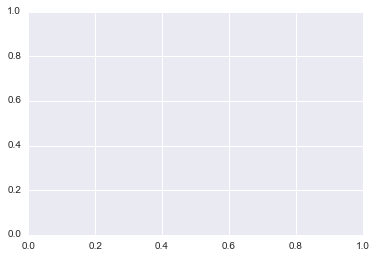

In [91]:
plt.plot(xr, yr, linewidth=2.0)

In [48]:
DistCount = pd.read_csv('/Users/supermaxfederman/Desktop/Capstone/Countybreakdown.csv')

In [49]:
DistCount

,District,County,Split,CPVI (Party),CPVI (Score)
0,1,Delaware,No,D,28.0
1,1,Philadelphia,No,NaN,NaN
2,2,Delaware,No,D,38.0
3,2,Philadelphia,No,NaN,NaN
4,3,Erie,Yes,R,8.0
5,3,Crawford,No,NaN,NaN
6,3,Mercer,No,NaN,NaN
7,3,Lawrence,Yes,NaN,NaN
8,3,Butler,No,NaN,NaN
9,3,Armstrong,No,NaN,NaN


In [50]:
temp = VR_El_11.merge(DistCount, left_on='County', right_on='County', how = 'right')

In [51]:
temp = temp.drop(['Split', 'CPVI (Party)', 'CPVI (Score)'], axis=1)

In [65]:
temp['Republican'] = [float(str(x).replace(",","")) for x in temp.Republican]

In [67]:
temp.sum()

Republican    4597474.0
District          899.0
dtype: float64

In [55]:
temp.groupby(by ='District', axis =0).sum()

,County
District,
1,DelawarePhiladelphia
2,DelawarePhiladelphia
3,ArmstrongButlerClarionCrawfordErieLawrenceMercer
4,AdamsCumberlandDauphinYork
5,CameronCentreClarionClearfieldClintonElkErieFo...
6,BerksChesterLebanonMontgomery
7,Montgomery
8,Bucks
9,BedfordBlairCambriaFayetteFranklinFultonGreene...


In [97]:
# add districts other dataframes.

# Use and explain the Cook's Partisan Voting Index (CPVI) - a metric used to gauge the political leans of a given district

# Find overall R vs D split.

# Find alternative division of districts to more accurately represent the state's political leanings. 

# Using registered R vs D populations per county, redraw the voting districts to be more representative of the people\
# Using the actual voting districts, compare how well the existing voting districts actually represent the counties and\
# state overall. 

# For an example, redraw the political map of PA being as Gerrymandered as pobbile, showing how to manipulate districts\
# for a D and R blowout. 

# Use the perfectly balanced district map as a baseline. Anything outside a reasonable range (Standard Deviation), can\
# be classified as having been manipulated. 


In [98]:
# Total Republicans, Democrats, Independents, and others by the year for each year

# Explain that Pennsylvania actually has a populations of ___ , but these are out of eligible voters

# Graph trends in data, see which way the country is currently leaning towards 

In [99]:
# Total Republicans, Dems per voting district, show newest districts vs old district mapping

# Show current vs old voting districts - population and political makeup of each district. 

In [149]:
votestats = pd.read_csv('/Users/supermaxfederman/Desktop/currentvotestats.csv')

In [150]:
votestats

,Information as of 12/05/2016,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,County,ID#,Count of Democratic Voters,Count of Republican Voters,Count of No Affiliation Voters,Count of all Other Voters,Total Count of All Voters
1,ADAMS,2290,"20,145","36,061","6,635","3,963","66,804"
2,ALLEGHENY,2291,"539,910","259,539","72,748","52,459","924,656"
3,ARMSTRONG,2292,"15,784","22,125","2,475","2,175","42,559"
4,BEAVER,2293,"59,132","40,836","6,287","7,304","113,559"
5,BEDFORD,2294,"9,448","21,773","1,760","1,520","34,501"
6,BERKS,2295,"120,219","100,783","24,392","14,410","259,804"
7,BLAIR,2296,"24,039","44,346","5,310","4,123","77,818"
8,BRADFORD,2297,"10,481","22,428","2,457","2,349","37,715"
9,BUCKS,2298,"197,878","188,562","43,291","30,864","460,595"


In [151]:
votestats.columns = votestats.iloc[0]

In [152]:
votestats.reindex(votestats.index.drop(0))
currentPA = votestats[1:]

In [154]:
currentPA.to_csv('currentPA.csv')

AttributeError: 'NoneType' object has no attribute 'drop'